In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


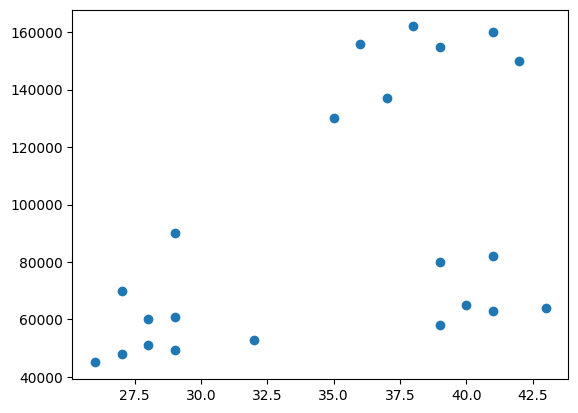

In [18]:
plt.scatter(df['Age'],df['Income'])
plt.show()

In [19]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
parameter=model.get_params()
print(parameter)

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [20]:
y_pred=model.fit_predict(df[['Age','Income']])
y_pred

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [21]:
df['cluster']=y_pred
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [22]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

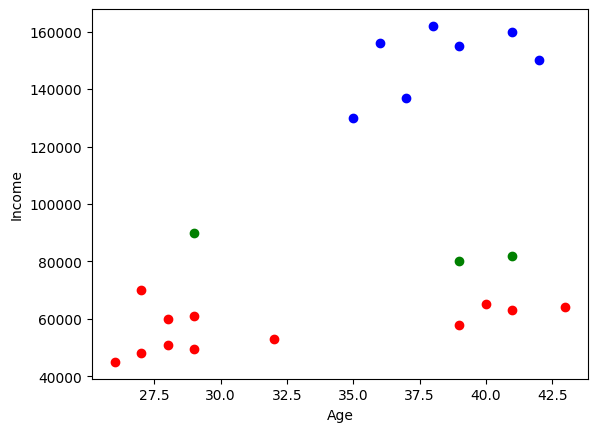

In [23]:
plt.scatter(df0.Age,df0['Income'],color='green')
plt.scatter(df1.Age,df1['Income'],color='blue')
plt.scatter(df2.Age,df2['Income'],color='red')

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [25]:
model=KMeans(n_clusters=3)
y_pred=model.fit_predict(df[['Age','Income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [26]:
df['cluster']=y_pred
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [27]:
model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

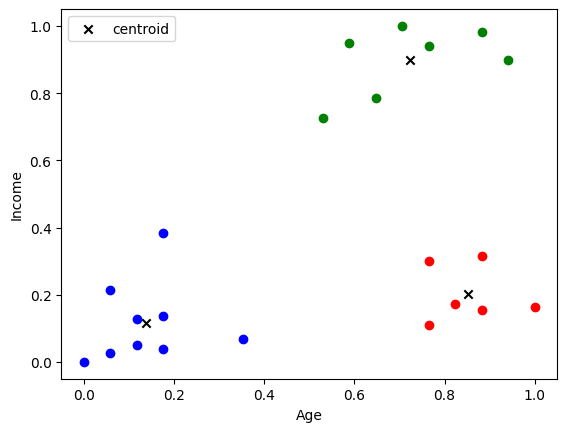

In [34]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.Age,df0['Income'],color='green')
plt.scatter(df1.Age,df1['Income'],color='blue')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',marker='x',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

Sum of Square error

In [ ]:
k_range=range(1,15)
sse=[]
for k in k_range:
    model=KMeans(n_clusters=k)
    model.fit(df[['Age','Income']])
    sse.append(model.inertia_)  #this inertia give us sum of square error

sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.368773407644059,
 0.2963623258321304,
 0.22508595962223274,
 0.174623865866879,
 0.16259520162974458,
 0.12659754550817162,
 0.08911561350120487,
 0.06554005805181391,
 0.056196282082036066,
 0.057284321772092736,
 0.03207020841880216]

Elbow plot

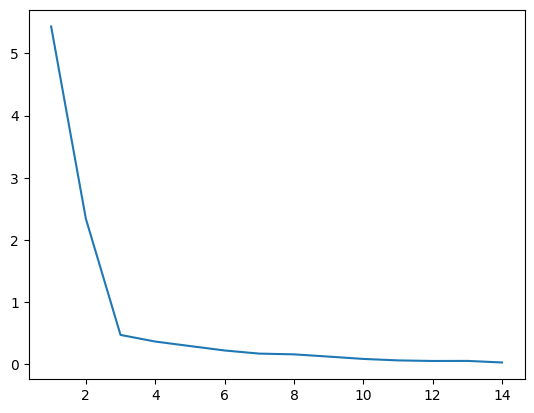

In [37]:
plt.plot(k_range,sse)